<a href="https://colab.research.google.com/github/sriram403/MachineLearningBlogs/blob/main/BinaryClassificationRealWorldProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Body Signal Of Smoking 🚭

**As we all know that smoking is bad For our health but sill some people are smoking without even thier loved one knows**

*Thats bad lets create a model called `catcher` so it takes in all the reading of the body and predict whether he is a smoker or not* 

In [ ]:
# !unzip "/content/drive/MyDrive/Datasets/smoker/archive (3).zip" -d "/content/drive/MyDrive/Datasets/smoker"

##lets get the Whole data 

In [ ]:
import pandas as pd
smoking_whole_df = pd.read_csv("/content/drive/MyDrive/Datasets/smoker/smoking.csv")
smoking_whole_df.head(1).T

,0
ID,0
gender,F
age,40
height(cm),155
weight(kg),60
waist(cm),81.3
eyesight(left),1.2
eyesight(right),1.0
hearing(left),1.0
hearing(right),1.0


## The Features of the dataset

* ID : index
* gender
* age : 5-years gap
* height(cm)
* weight(kg)
* waist(cm) : Waist circumference length
* eyesight(left)
* eyesight(right)
* hearing(left)
* hearing(right)
* systolic : Blood pressure
* relaxation : Blood pressure
* fasting blood sugar
* Cholesterol : total
* triglyceride
* HDL : cholesterol type
* LDL : cholesterol type
* hemoglobin
* Urine protein
* serum creatinine
* AST : glutamic oxaloacetic transaminase type
* ALT : glutamic oxaloacetic transaminase type
* Gtp : γ-GTP
* oral : Oral Examination status
* dental caries
* tartar : tartar status
* smoking

##Lo0king the distribution of the dataset attributes

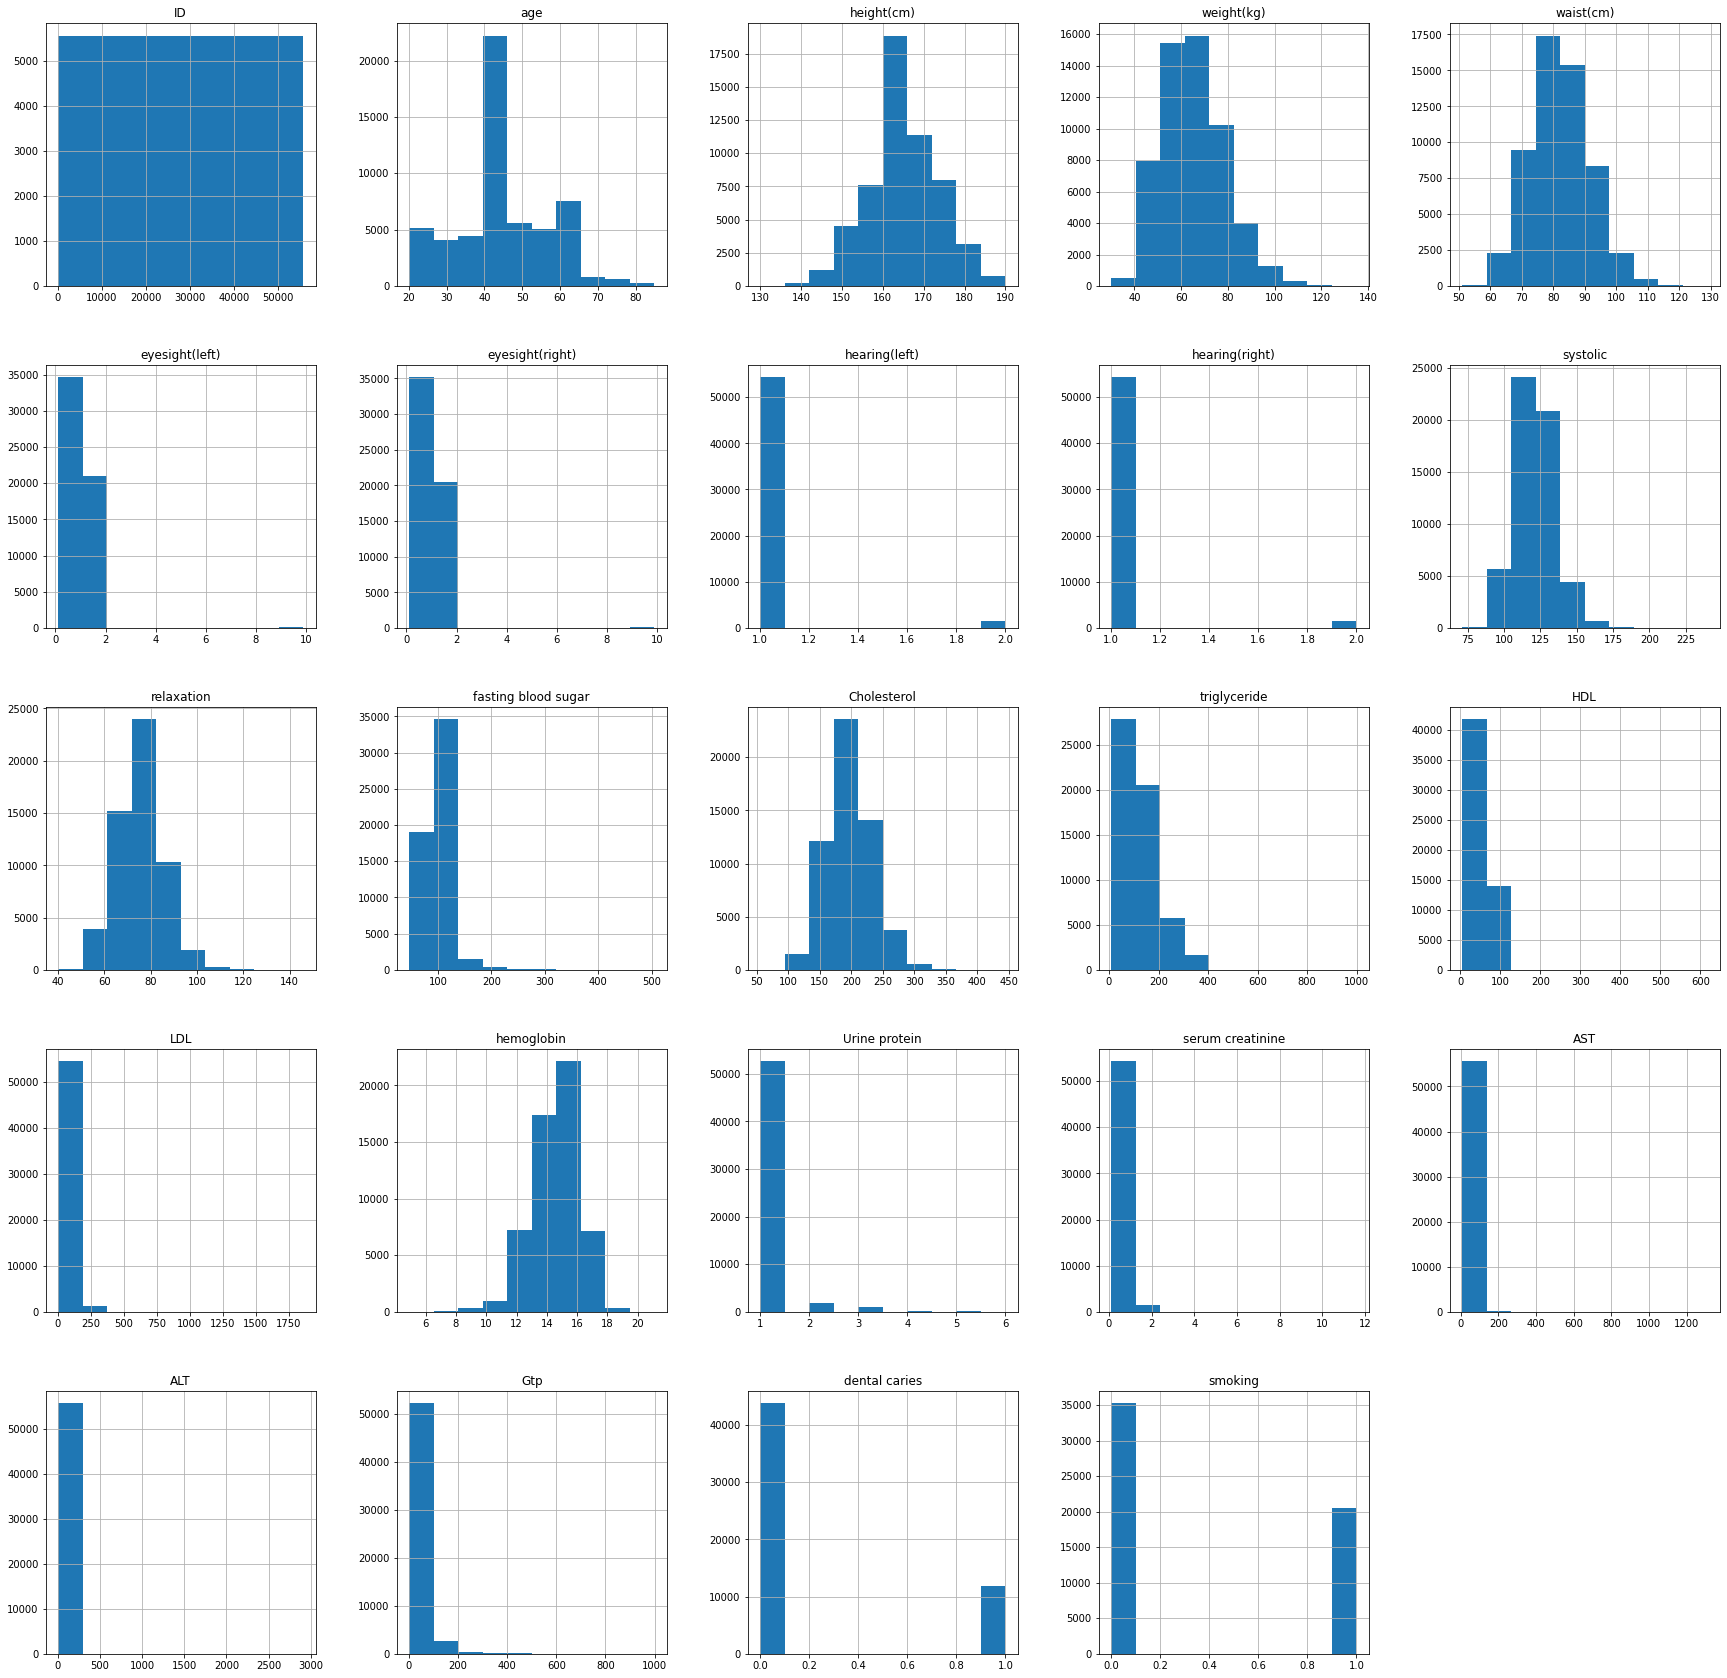

In [ ]:
smoking_whole_df.hist(figsize=(30,30));

##Getting the info of the data set

In [ ]:
smoking_whole_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

###Getting the mean std min max of the dataset

In [ ]:
smoking_whole_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


In [ ]:
import numpy as np

In [ ]:
x = pd.Series([10,20,30,40,50])
mean = (10+20+30+40+50)/5 # 11.0
variences = ((1-mean)**2+(2-mean)**2+(3-mean)**2+(4-mean)**2+(5-mean)**2)/len(x)
standard_deviation = np.sqrt(variences)
standard_deviation,mean

(27.03701166919155, 30.0)

###Getting the correlation of the dataset

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

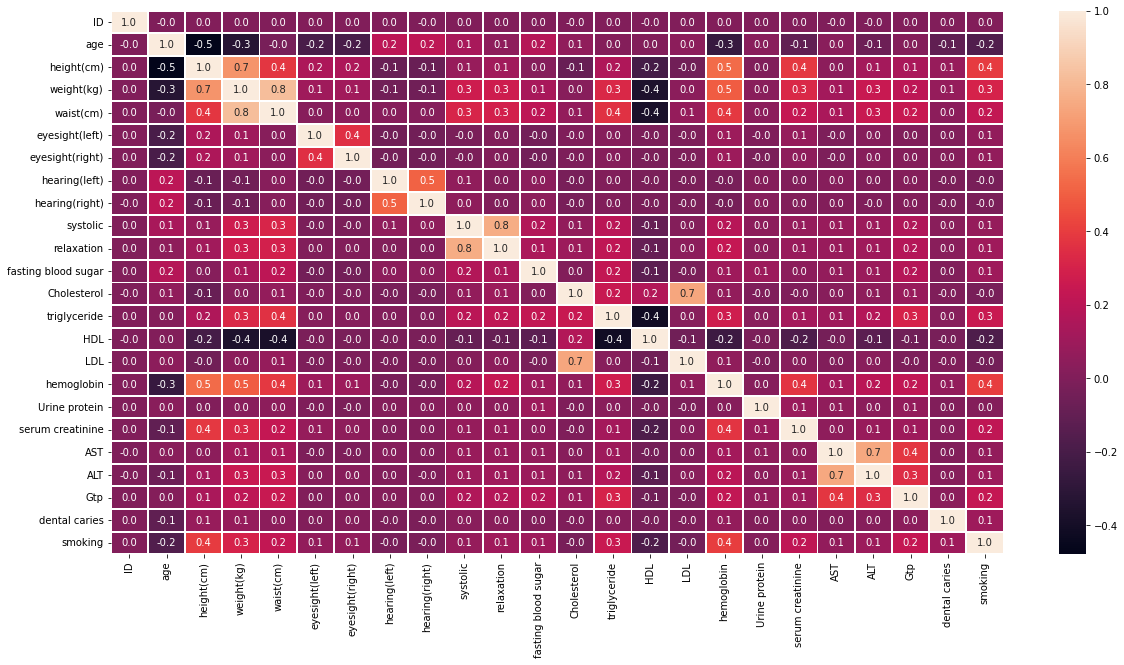

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(smoking_whole_df.corr(),annot=True,fmt=".1f",linewidths=1)

##Lets find out which features are categorical and which are numerical

In [ ]:
smoking_whole_df.head().T

,0,1,2,3,4
ID,0,1,2,3,4
gender,F,F,M,M,F
age,40,40,55,40,40
height(cm),155,160,170,165,155
weight(kg),60,60,60,70,60
waist(cm),81.3,81.0,80.0,88.0,86.0
eyesight(left),1.2,0.8,0.8,1.5,1.0
eyesight(right),1.0,0.6,0.8,1.5,1.0
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0


###changing the Categorical Values into 1 or zero

In [ ]:
smoking_whole_df.gender = smoking_whole_df.gender.map({"M":1,"F":0})
smoking_whole_df.gender.value_counts()

1    35401
0    20291
Name: gender, dtype: int64

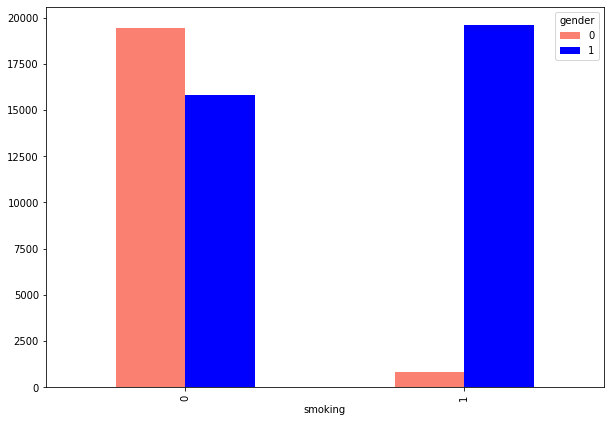

In [ ]:
pd.crosstab(smoking_whole_df.smoking,smoking_whole_df.gender).plot(kind="bar",color=["salmon","blue"],figsize=(10,7))

##lets  create a function that get the numerical value and plot them in the graph

In [ ]:
def plot_numerical_values(columns):
  for i,column in enumerate(columns):
    plt.subplot(5,5,i+1)
    sns.distplot(smoking_whole_df[column])


In [ ]:
smoking_whole_df[40:80].T

,40,41,42,43,44,45,46,47,48,49,...,70,71,72,73,74,75,76,77,78,79
ID,49,51,52,53,54,56,57,58,59,60,...,88,89,90,91,92,93,94,96,97,98
gender,0,0,1,1,0,1,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0
age,40,50,60,40,80,20,25,30,50,60,...,50,45,50,30,65,45,20,45,60,40
height(cm),160,160,160,185,145,165,180,180,155,165,...,155,155,155,165,165,170,170,160,170,160
weight(kg),50,80,70,75,55,70,60,80,45,65,...,60,60,65,75,55,60,75,45,85,55
waist(cm),65.0,95.0,90.0,76.0,92.0,78.0,74.0,91.0,69.0,82.0,...,76.3,75.5,73.0,85.0,77.0,76.0,87.0,63.3,103.2,65.0
eyesight(left),1.0,1.2,0.2,1.2,0.1,1.2,0.7,0.2,1.2,1.0,...,0.4,1.0,1.0,0.9,0.8,1.2,1.2,0.7,0.2,1.0
eyesight(right),1.0,0.1,0.1,1.5,0.4,1.0,0.7,0.3,1.0,1.0,...,0.7,1.2,1.2,1.2,0.7,1.2,1.0,1.0,0.8,1.0
hearing(left),1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##Lets create a pipeline that can transform the categorical and numerical columns

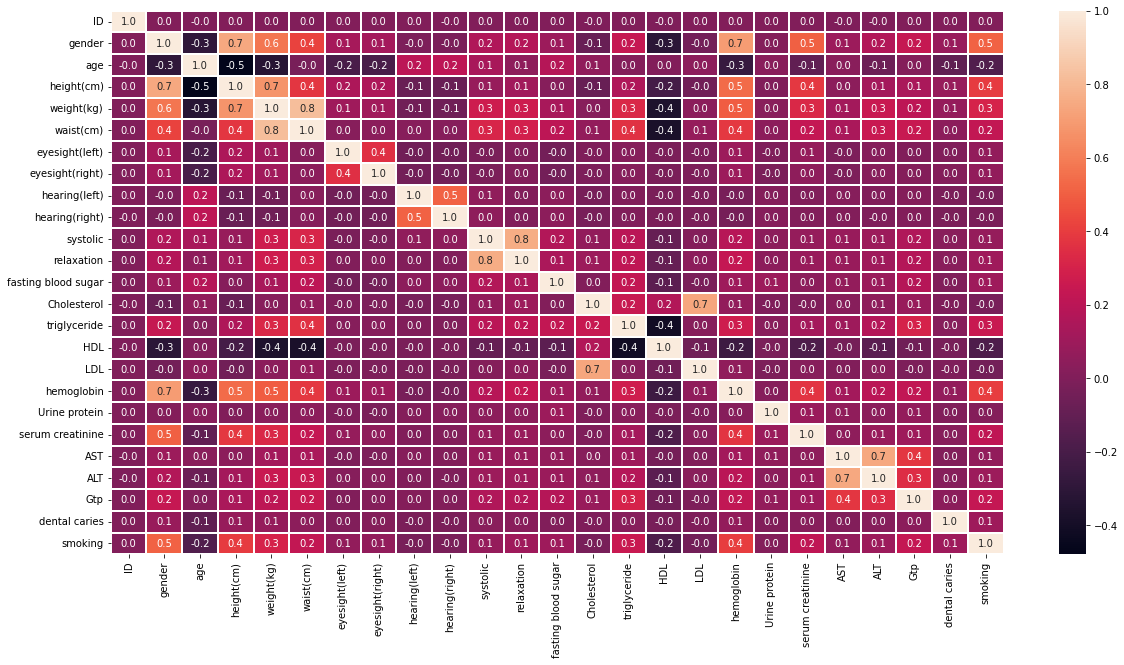

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(smoking_whole_df.corr(),annot=True,fmt=".1f",linewidths=1)

In [ ]:
# %%time
# import pandas as pd
# from pandas.plotting import scatter_matrix
# columns = ["gender","age","height(cm)","weight(kg)","triglyceride","HDL","hemoglobin","serum creatinine","Gtp","smoking"]
# plt.figure(figsize=(30,30))
# scatter_matrix(smoking_whole_df[columns],figsize=(20,20));

In [ ]:
smoking_whole_df["hearing(right)"].value_counts()

1.0    54236
2.0     1456
Name: hearing(right), dtype: int64

In [ ]:
smoking_whole_df["hearing(left)"].value_counts()

1.0    54267
2.0     1425
Name: hearing(left), dtype: int64

#FeatureEngineering

In [ ]:
smoking_whole_df["hearingloss"] = (smoking_whole_df["hearing(left)"] != 1.0) | (smoking_whole_df["hearing(right)"] != 1.0)
smoking_whole_df["highbloodpressure"] = (smoking_whole_df["systolic"] > 120) | (smoking_whole_df["relaxation"] > 80)
smoking_whole_df.highbloodpressure.value_counts()

True     28404
False    27288
Name: highbloodpressure, dtype: int64

In [ ]:
x = smoking_whole_df.drop("smoking",axis=1)
y = smoking_whole_df["smoking"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train),len(x_test),len(y_train),len(y_test)

(44553, 11139, 44553, 11139)

In [ ]:
x_train.shape

(44553, 28)

In [ ]:
x_train

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,hearingloss,highbloodpressure
10126,12675,1,60,165,55,76.0,1.0,1.0,1.0,1.0,...,1.0,0.7,26.0,21.0,17.0,Y,0,Y,False,False
2467,3097,1,40,175,80,94.0,1.0,1.0,1.0,1.0,...,1.0,0.9,15.0,15.0,35.0,Y,1,Y,False,True
36288,45345,1,35,180,90,98.0,1.2,1.5,1.0,1.0,...,1.0,0.8,21.0,26.0,15.0,Y,0,Y,False,False
32339,40390,1,40,175,70,77.8,1.0,1.2,1.0,1.0,...,1.0,0.9,18.0,13.0,20.0,Y,0,N,False,False
29452,36755,1,45,175,65,78.0,1.5,1.5,1.0,1.0,...,1.0,0.9,19.0,18.0,39.0,Y,0,Y,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,908,1,25,170,80,82.0,1.0,1.2,1.0,1.0,...,1.0,0.8,32.0,52.0,28.0,Y,0,Y,False,False
54343,49024,1,45,165,55,70.0,0.7,1.0,1.0,1.0,...,1.0,0.8,25.0,16.0,21.0,Y,0,Y,False,True
38158,47675,1,35,180,75,86.7,1.2,1.5,1.0,1.0,...,2.0,0.8,13.0,25.0,30.0,Y,1,Y,False,True
860,1076,0,55,155,60,86.0,0.8,0.8,1.0,1.0,...,1.0,0.8,25.0,19.0,17.0,Y,0,Y,False,False


In [ ]:
def getting_num_values(x):
  x_num = x.reindex(columns=["age",smoking_whole_df.columns[1],"height(cm)","weight(kg)","waist(cm)","eyesight(left)","fasting blood sugar","Cholesterol","triglyceride","HDL","LDL","hemoglobin","serum creatinine","AST","ALT","Gtp","Urine protein","oral","dental caries","tartar","hearingloss","highbloodpressure"])
  return x_num

In [ ]:
col = ["age","gender","height(cm)","weight(kg)","waist(cm)","eyesight(left)","fasting blood sugar","Cholesterol","triglyceride","HDL","LDL","hemoglobin","serum creatinine","AST","ALT","Gtp","Urine protein","oral","dental caries","tartar","hearingloss","highbloodpressure"]

In [ ]:
smoking_whole_df.head(1).T

,0
ID,0
gender,0
age,40
height(cm),155
weight(kg),60
waist(cm),81.3
eyesight(left),1.2
eyesight(right),1.0
hearing(left),1.0
hearing(right),1.0


In [ ]:
x_train = getting_num_values(x_train)
x_train.head(1).T

,10126
age,60
gender,1
height(cm),165
weight(kg),55
waist(cm),76.0
eyesight(left),1.0
fasting blood sugar,95.0
Cholesterol,165.0
triglyceride,63.0
HDL,45.0


In [ ]:
x_test = getting_num_values(x_test)

In [ ]:
x_train.oral = x_train.oral.map({"Y":1})
x_train.tartar = x_train.tartar.map({"Y":1,"N":0})
x_train.head()

,age,gender,height(cm),weight(kg),waist(cm),eyesight(left),fasting blood sugar,Cholesterol,triglyceride,HDL,...,serum creatinine,AST,ALT,Gtp,Urine protein,oral,dental caries,tartar,hearingloss,highbloodpressure
10126,60,1,165,55,76.0,1.0,95.0,165.0,63.0,45.0,...,0.7,26.0,21.0,17.0,1.0,1,0,1,False,False
2467,40,1,175,80,94.0,1.0,103.0,213.0,85.0,63.0,...,0.9,15.0,15.0,35.0,1.0,1,1,1,False,True
36288,35,1,180,90,98.0,1.2,93.0,158.0,103.0,35.0,...,0.8,21.0,26.0,15.0,1.0,1,0,1,False,False
32339,40,1,175,70,77.8,1.0,84.0,169.0,135.0,40.0,...,0.9,18.0,13.0,20.0,1.0,1,0,0,False,False
29452,45,1,175,65,78.0,1.5,97.0,225.0,100.0,64.0,...,0.9,19.0,18.0,39.0,1.0,1,0,1,False,False


In [ ]:
x_test.oral = x_test.oral.map({"Y":1})
x_test.tartar = x_test.tartar.map({"Y":1,"N":0})

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
preprocessing_layer_num = Pipeline([("Standard",StandardScaler())])
preprocessing_layer_num.fit_transform(x_train)
x_train_pre = preprocessing_layer_num.transform(x_train)
x_test_pre = preprocessing_layer_num.transform(x_test)
x_train_pre

array([[ 1.30852546,  0.75687906,  0.03709807, ...,  0.89482024,
        -0.20051066, -1.02066095],
       [-0.3470654 ,  0.75687906,  1.12484427, ...,  0.89482024,
        -0.20051066,  0.97975728],
       [-0.76096312,  0.75687906,  1.66871736, ...,  0.89482024,
        -0.20051066, -1.02066095],
       ...,
       [-0.76096312,  0.75687906,  1.66871736, ...,  0.89482024,
        -0.20051066,  0.97975728],
       [ 0.89462775, -1.32121504, -1.05064812, ...,  0.89482024,
        -0.20051066, -1.02066095],
       [ 0.89462775,  0.75687906,  1.66871736, ...,  0.89482024,
        -0.20051066, -1.02066095]])

In [ ]:
x_train_pre.shape

(44553, 22)

##Creating a model

In [ ]:
import tensorflow as tf
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_1 = model_1.fit(x_train_pre,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1114/1114 [==============================] - 6s 4ms/step - loss: 0.4732 - accuracy: 0.7467 - val_loss: 0.4645 - val_accuracy: 0.7535
Epoch 2/100
1114/1114 [==============================] - 5s 4ms/step - loss: 0.4572 - accuracy: 0.7611 - val_loss: 0.4645 - val_accuracy: 0.7517
Epoch 3/100
1114/1114 [==============================] - 5s 4ms/step - loss: 0.4539 - accuracy: 0.7645 - val_loss: 0.4584 - val_accuracy: 0.7577
Epoch 4/100
1114/1114 [==============================] - 3s 2ms/step - loss: 0.4514 - accuracy: 0.7660 - val_loss: 0.4590 - val_accuracy: 0.7591
Epoch 5/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4499 - accuracy: 0.7660 - val_loss: 0.4570 - val_accuracy: 0.7606
Epoch 6/100
1114/1114 [==============================] - 3s 2ms/step - loss: 0.4492 - accuracy: 0.7677 - val_loss: 0.4579 - val_accuracy: 0.7584
Epoch 7/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4481 - accuracy: 0.7680 - val_loss: 0.4568 - val_ac

In [ ]:
from sklearn.metrics import confusion_matrix
pred = np.round(model_1.predict(x_test_pre))
confusion_matrix(y_test,pred)

array([[5771, 1256],
       [1437, 2675]])

In [ ]:
model_1.evaluate(x_test_pre,y_test)

349/349 [==============================] - 1s 3ms/step - loss: 0.4733 - accuracy: 0.7582


[0.4732866585254669, 0.758236825466156]

In [ ]:
# from sklearn.model_selection import cross_val_score
# model_1_scores = cross_val_score(model_1,x_train_pre,y_train,cv=10,verbose=1,score="accuracy")
# model_1_scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators=2000)
model_2.fit(x_train_pre,y_train)
model_2.score(x_train_pre,y_train)

1.0

In [ ]:
pred = np.round(model_2.predict(x_test_pre))
pred[:10],y_test[:10]

(array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0]), 33967    0
 21956    1
 15458    0
 36215    0
 8886     0
 49225    0
 50609    1
 7821     0
 51757    0
 14521    0
 Name: smoking, dtype: int64)

In [ ]:
model_2.score(x_test_pre,y_test)

0.8325702486758236

In [ ]:
from sklearn.model_selection import cross_val_score
model_3 = cross_val_score(model_2,x_train_pre,y_train,cv=10,verbose=1)
model_3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
model_2_fea_imp = model_2.feature_importances_

<BarContainer object of 22 artists>

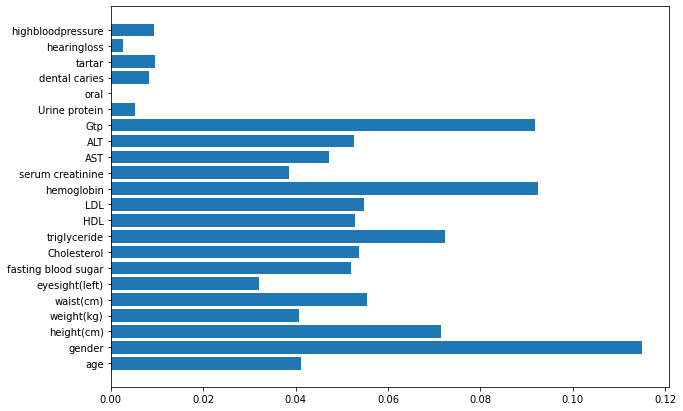

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(col,model_2_fea_imp)

In [ ]:
pred =np.round(model_2.predict(x_test_pre))

In [ ]:
pred_train =np.round(model_2.predict(x_train_pre))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred,y_test)

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt=".1f")

In [ ]:
cm_pred = confusion_matrix(pred_train,y_train)
sns.heatmap(cm_pred,annot=True,fmt=".1f")

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
model_fea_imp = permutation_importance(model_2,x_train_pre,y_train)
model_fea_imp

In [ ]:
plt.barh(col,model_fea_imp["importances_mean"])

In [ ]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()
model_3.fit(x_train_pre,y_train)

In [ ]:
model_3.score(x_test_pre,y_test)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_2,x_train_pre,y_train)

In [ ]:
plot_roc_curve(model_2,x_test_pre,y_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))